### helper file to handle UPFD GCNFN model implementation in https://github.com/safe-graph/GNN-FakeNews

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from util import run_model
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
# from GNNFakeNews.utils.helpers.fake_news_dataset_manager import FakeNewsNetDatasetManager
from GNNFakeNews.utils.enums import GNNModelTypeEnum, GNNFeatureTypeEnum #, GNNDatasetTypeEnum

## Load FakeNewsNet dataset

# 1.1. UPFD_GCNFN

## DATASET TYPE = POLITIFACT, FEATURE = BERT

In [4]:
model_type = GNNModelTypeEnum.UPFD_GCNFN
# follow the paper of UPFD for best performance.
model, dataset_manager = run_model(model_type)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.UPFD_GCNFN
dataset = GNNDatasetTypeEnum.POLITIFACT
batch_size = 128
lr = 0.01
weight_decay = 0.001
n_hidden = 128
epochs = 60
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f7604b39650>
feature = GNNFeatureTypeEnum.SPACY
concat = True
#################################
Loading dataset 'politifact' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.8100, f1_macro: 0.8053, f1_micro: 0.8100,precision: 0.9445, recall: 0.6696, auc: 0.8983, ap: 0.8973


In [5]:
model.last_conv_layers['train_last_layer_val'][0].size()

torch.Size([62, 256])

In [6]:
model.last_conv_layers['val_last_layer_val'][0].size()

torch.Size([31, 256])

In [7]:
model.last_conv_layers['test_last_layer_val'][0].size()

torch.Size([128, 256])

In [8]:
model.last_conv_layers['test_last_layer_val'][1].size()

torch.Size([93, 256])

In [9]:
model.m_dataset_manager.train_loader.dataset.dataset.len

<bound method InMemoryDataset.len of politifact(314)>

train_last_layer_val size: (62, 256)
train_y size: (62,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


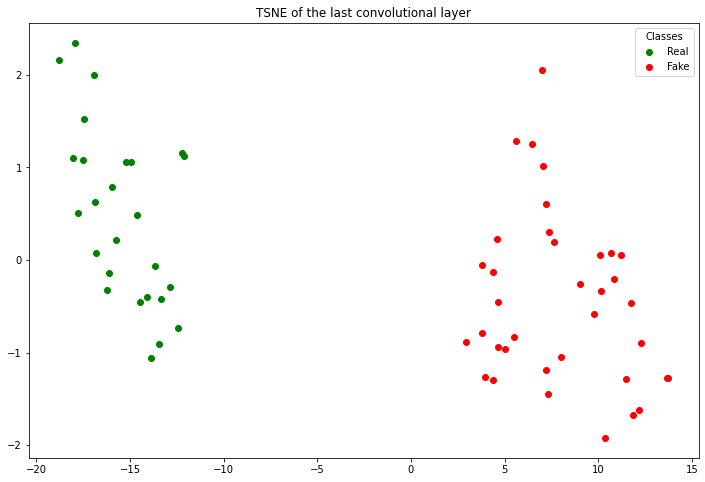

In [16]:
model.m_visualize_tsne_of_last_conv_layer(perplexity=15, init='pca', n_iter=1000, learning_rate=10)

all_last_layer_val size: (314, 256)
all_y size: (314,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


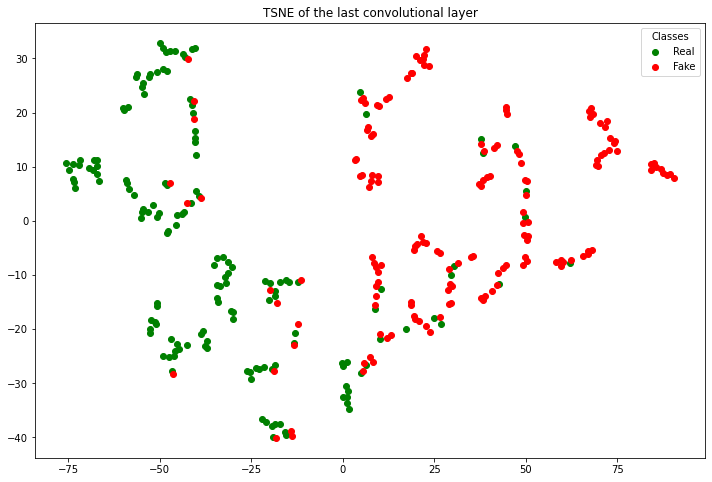

In [17]:
model.m_visualize_tsne_of_last_conv_layer(perplexity=5, init='pca', n_iter=1000, split='all')

val_last_layer_val size: (31, 256)
val_y size: (31,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


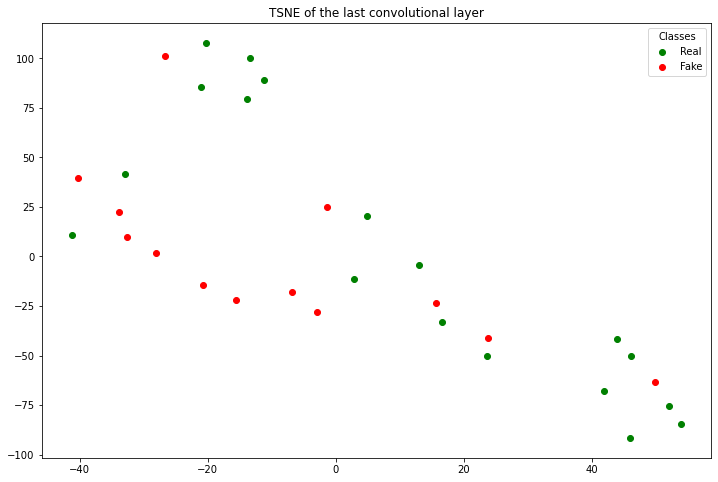

In [15]:
model.m_visualize_tsne_of_last_conv_layer(perplexity=5, init='pca', n_iter=1000, split='val')

In [6]:
# fakenewsnet_dataset_mgr = FakeNewsNetDatasetManager(GNNDatasetTypeEnum.POLITIFACT)
# existing_news_idxs = fakenewsnet_dataset_mgr.get_existing_news_indexes_for_torch_dataset()

In [7]:
sample_data, sample_data_idx = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0, return_indexes=True) #, existing_indexes_in_dataset=existing_news_idxs)

available idxs:  [  1   6  14  16  18  19  21  23  24  25  27  28  36  38  41  48  50  56
  59  60  66  69  72  81  90  91  96 102 125 133 137 143 146 150 153 155]
Choosing indexes in dataset: [36]
Choosing indexes in train: [43]


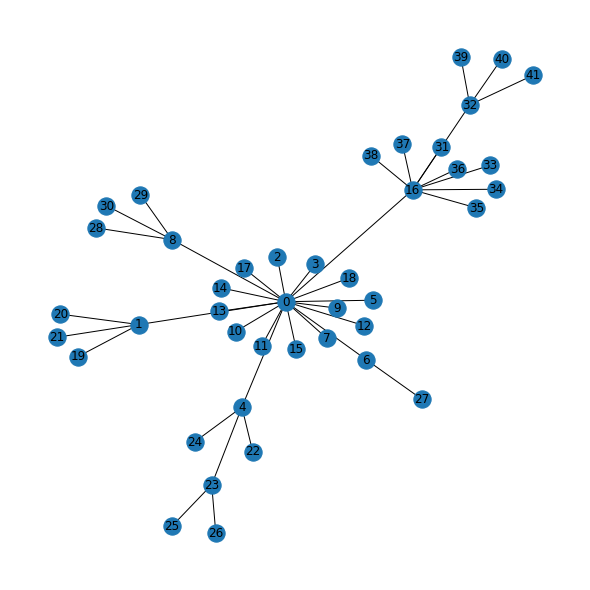

In [14]:
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx
import networkx as nx
viz_sample = to_networkx(sample_data[0] , remove_self_loops=True, to_undirected=True)
plt.figure(1, figsize=(8, 8))
nx.draw(viz_sample, with_labels=True)

In [15]:
explainer = GNNModelExplainer(model, sample_data[0])

Explain graph: 100%|██████████| 200/200 [00:01<00:00, 119.42it/s]


y: Fake
Removing edges with score less than 0.10006555169820786 with min torch.return_types.min(
values=tensor(0.0762),
indices=tensor(6)) and max torch.return_types.max(
values=tensor(0.1135),
indices=tensor(36))
 ############ Graph before dropping edges according to the edge mask ############
Number of nodes before dropping unimportant edges: 37


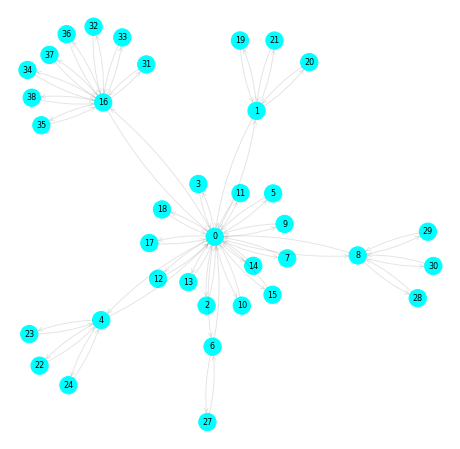

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 62 edges out of 124
Number of nodes before dropping unimportant edges: 16


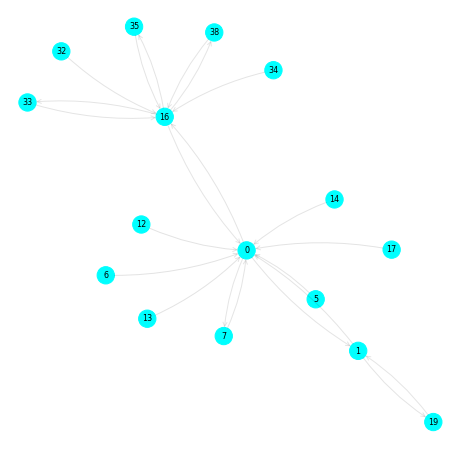

In [18]:
explainer.visualize_explaining_graph()

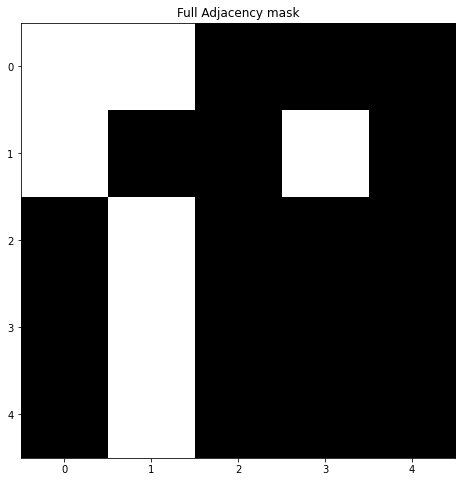

In [7]:
explainer.visualize_adjacency_matrix()

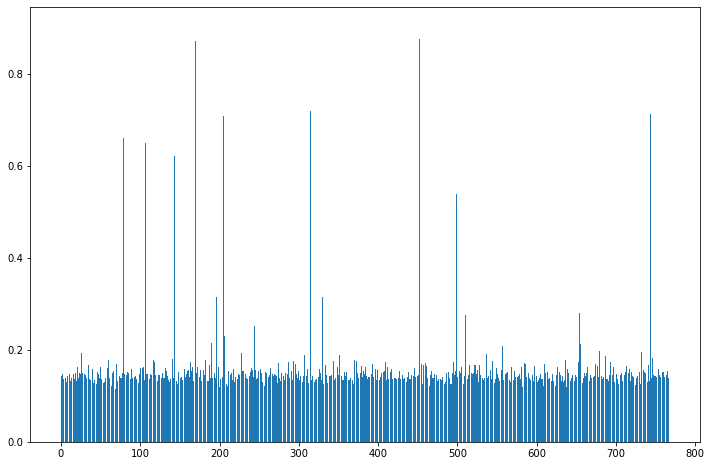

In [16]:
node_feat_mask_np = explainer.node_feat_mask.cpu().numpy()
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 8))
plt.bar([i for i in range(0, len(node_feat_mask_np))], height=node_feat_mask_np)
plt.show()

### Randomly sample 10 fake news instances and explain them

In [7]:
sample_data_list, sample_data_indexes = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0, len_samples=10, return_indexes=True)

sample_id_node_id_dict = {}

Choosing indexes: [ 50  24  21  60  81   6 155   1  59 150]


Explain graph: 100%|██████████| 200/200 [00:01<00:00, 115.90it/s]


y: Fake
Removing edges with score less than 0.12916697561740875 with min torch.return_types.min(
values=tensor(0.1065),
indices=tensor(548)) and max torch.return_types.max(
values=tensor(0.1516),
indices=tensor(442))
Dropping 275 edges out of 550


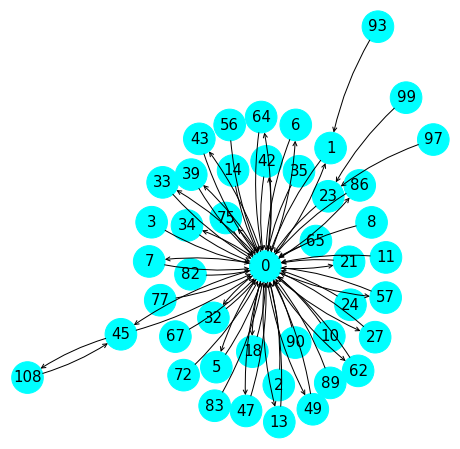

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 226.42it/s]


y: Fake
Removing edges with score less than 0.11655297130346298 with min torch.return_types.min(
values=tensor(0.0882),
indices=tensor(10)) and max torch.return_types.max(
values=tensor(0.1397),
indices=tensor(146))
Dropping 151 edges out of 301


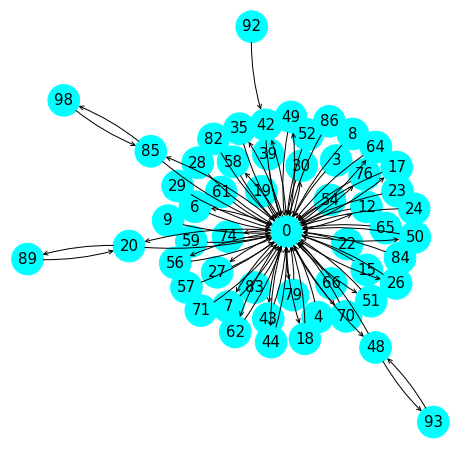

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 221.30it/s]


y: Fake
Removing edges with score less than 0.13955789804458618 with min torch.return_types.min(
values=tensor(0.1228),
indices=tensor(1312)) and max torch.return_types.max(
values=tensor(0.1554),
indices=tensor(923))
Dropping 737 edges out of 1474


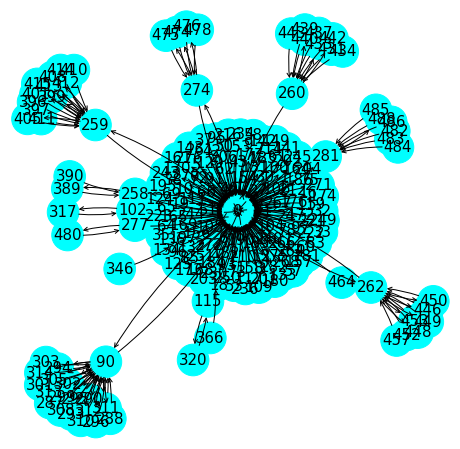

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 217.38it/s]


y: Fake
Removing edges with score less than 0.07331249862909317 with min torch.return_types.min(
values=tensor(0.0423),
indices=tensor(8)) and max torch.return_types.max(
values=tensor(0.9454),
indices=tensor(6))
Dropping 5 edges out of 10


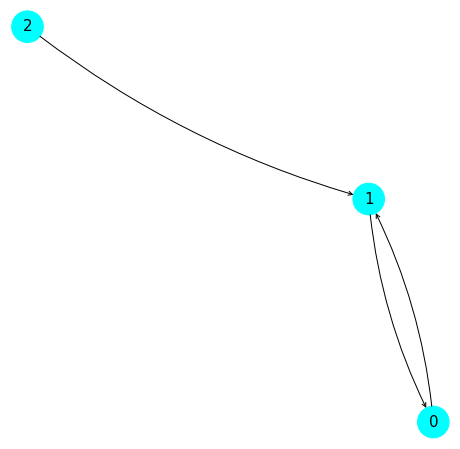

Explain graph: 100%|██████████| 200/200 [00:01<00:00, 169.66it/s]


y: Fake
Removing edges with score less than 0.09769042581319809 with min torch.return_types.min(
values=tensor(0.0800),
indices=tensor(88)) and max torch.return_types.max(
values=tensor(0.9544),
indices=tensor(72))
Dropping 52 edges out of 103


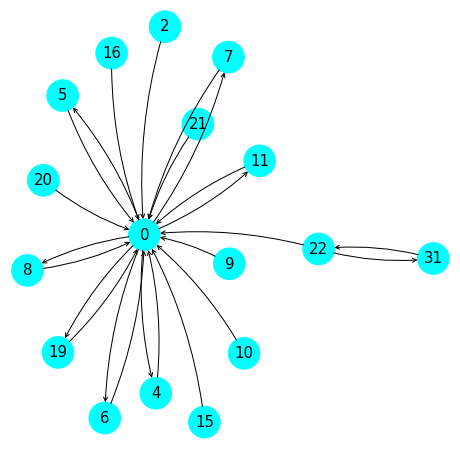

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 216.94it/s]


y: Fake
Removing edges with score less than 0.11505714058876038 with min torch.return_types.min(
values=tensor(0.0935),
indices=tensor(191)) and max torch.return_types.max(
values=tensor(0.1378),
indices=tensor(235))
Dropping 128 edges out of 256


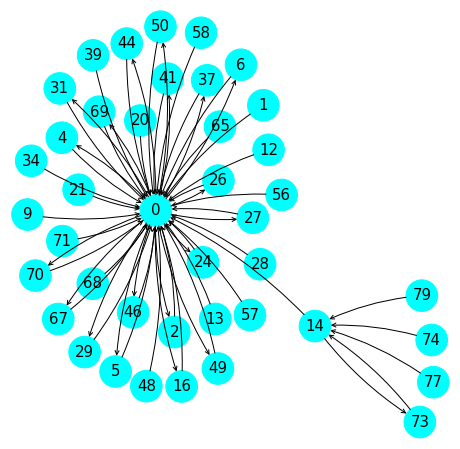

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 222.51it/s]


y: Fake
Removing edges with score less than 0.13429684937000275 with min torch.return_types.min(
values=tensor(0.1139),
indices=tensor(651)) and max torch.return_types.max(
values=tensor(0.1624),
indices=tensor(105))
Dropping 406 edges out of 811


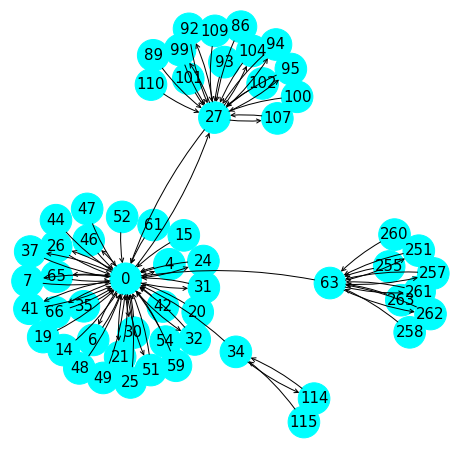

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 217.75it/s]


y: Fake
Removing edges with score less than 0.0865863487124443 with min torch.return_types.min(
values=tensor(0.0679),
indices=tensor(27)) and max torch.return_types.max(
values=tensor(0.9454),
indices=tensor(19))
Dropping 31 edges out of 61


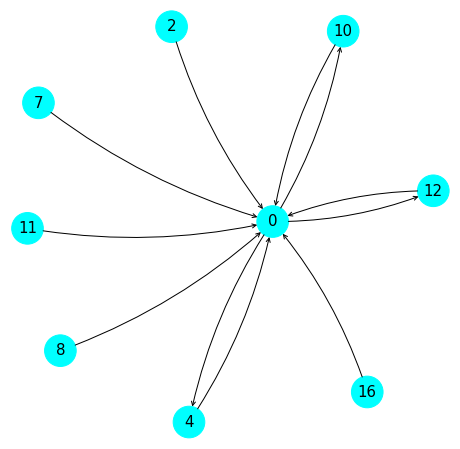

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 207.71it/s]


y: Fake
Removing edges with score less than 0.12635429203510284 with min torch.return_types.min(
values=tensor(0.1013),
indices=tensor(144)) and max torch.return_types.max(
values=tensor(0.1505),
indices=tensor(395))
Dropping 241 edges out of 481


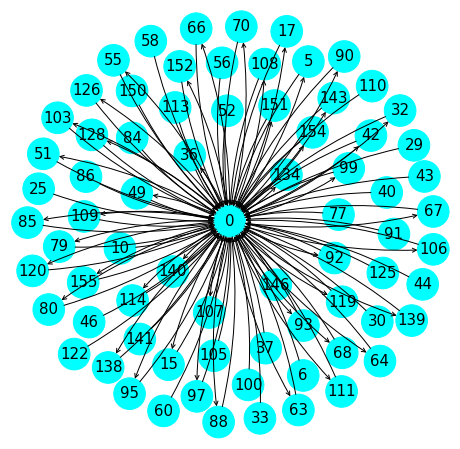

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 218.12it/s]


y: Fake
Removing edges with score less than 0.11489954590797424 with min torch.return_types.min(
values=tensor(0.0900),
indices=tensor(85)) and max torch.return_types.max(
values=tensor(0.1400),
indices=tensor(58))
Dropping 127 edges out of 253


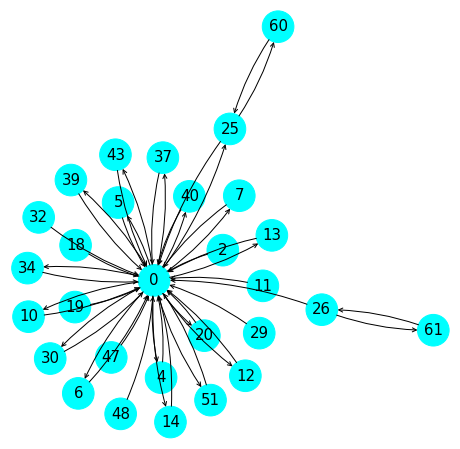

In [8]:
for sample, index in zip(sample_data_list, sample_data_indexes):
    e = GNNModelExplainer(model, sample)
    e.visualize_explaining_graph()
    sample_id_node_id_dict[index] = e.get_node_ids_of_explaining_subgraph()

In [9]:
from util import get_news_id_node_id_user_id_dict

news_node_user_dict, index_news_id_dict = get_news_id_node_id_user_id_dict(model.m_hparams.dataset)

In [10]:
news_user_twitter_id_map = {}

for sample_id, node_ids in sample_id_node_id_dict.items():
    # print(f'Sample {sample_id} with node_ids: {node_ids}')

    user_twitter_ids = []
    news_id = index_news_id_dict[sample_id]
    # print(news_node_user_dict[news_id])

    for node_id in node_ids:
        user_twitter_ids.append(news_node_user_dict[news_id][node_id])
    news_user_twitter_id_map[news_id] = user_twitter_ids
len(news_user_twitter_id_map)

10

In [11]:
import numpy as np
intersection = None
user_id_count_dict = {}
for key, user_id_list in news_user_twitter_id_map.items():
    for user_id in user_id_list:
        if user_id in user_id_count_dict.keys():
            user_id_count_dict[str(user_id)] += 1
        else:
            user_id_count_dict[str(user_id)] = 1
    if intersection is None:
        intersection = user_id_list
    else:
        intersection = np.intersect1d(intersection, user_id_list)

intersection

array([], dtype=int64)

In [12]:
import pandas as pd
user_id_count_df = pd.DataFrame.from_dict({'user_id': user_id_count_dict.keys(), 'tweet_count': user_id_count_dict.values()})
user_id_count_df[user_id_count_df.tweet_count > 1]

,user_id,tweet_count


### Randomly sample 10 real news instances and explain them

In [13]:
real_sample_data_list, real_sample_data_indexes = dataset_manager.get_random_train_samples(device=model.m_args.device, label=1, len_samples=10, return_indexes=True)

Choosing indexes: [300 229 249 169 259 313 184 186 175 266]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 227.21it/s]


y: Real
Removing edges with score less than 0.0877656638622284 with min torch.return_types.min(
values=tensor(0.0630),
indices=tensor(10)) and max torch.return_types.max(
values=tensor(0.9517),
indices=tensor(70))
Dropping 49 edges out of 97


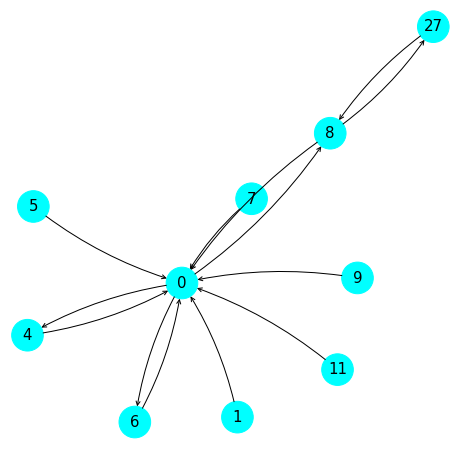

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 221.30it/s]


y: Real
Removing edges with score less than 0.1157289445400238 with min torch.return_types.min(
values=tensor(0.0733),
indices=tensor(137)) and max torch.return_types.max(
values=tensor(0.1407),
indices=tensor(192))
Dropping 181 edges out of 361


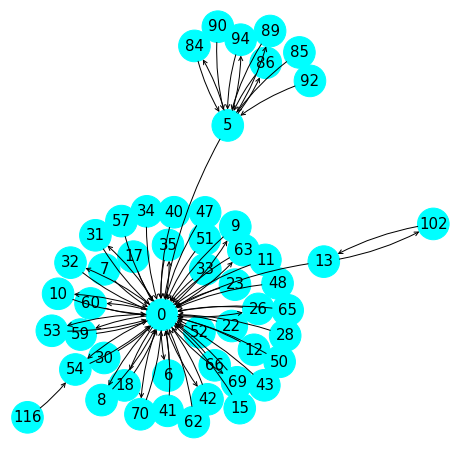

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 218.15it/s]


y: Real
Removing edges with score less than 0.1006682962179184 with min torch.return_types.min(
values=tensor(0.0817),
indices=tensor(66)) and max torch.return_types.max(
values=tensor(0.9104),
indices=tensor(41))
Dropping 88 edges out of 175


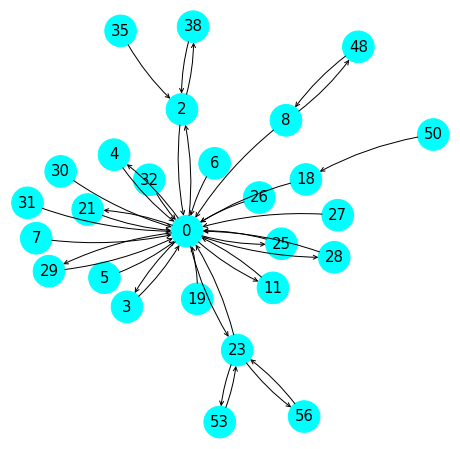

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 218.90it/s]


y: Real
Removing edges with score less than 0.13576315343379974 with min torch.return_types.min(
values=tensor(0.1125),
indices=tensor(983)) and max torch.return_types.max(
values=tensor(0.1585),
indices=tensor(457))
Dropping 556 edges out of 1111


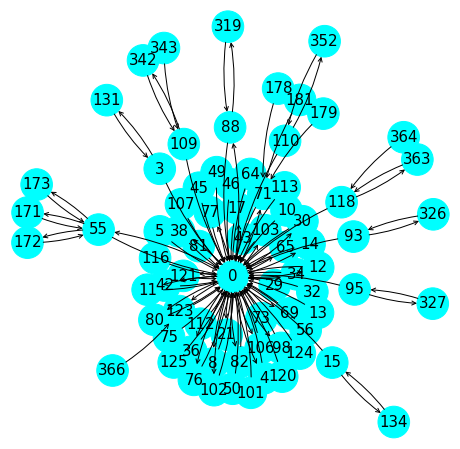

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 223.47it/s]


y: Real
Removing edges with score less than 0.08428064733743668 with min torch.return_types.min(
values=tensor(0.0597),
indices=tensor(33)) and max torch.return_types.max(
values=tensor(0.9422),
indices=tensor(44))
Dropping 31 edges out of 61


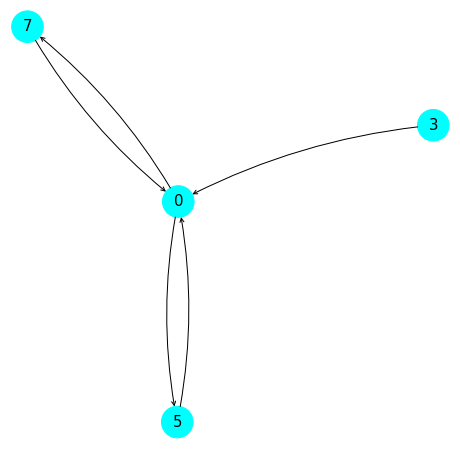

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 220.89it/s]


y: Real
Removing edges with score less than 0.1278368979692459 with min torch.return_types.min(
values=tensor(0.0897),
indices=tensor(436)) and max torch.return_types.max(
values=tensor(0.1520),
indices=tensor(323))
Dropping 305 edges out of 610


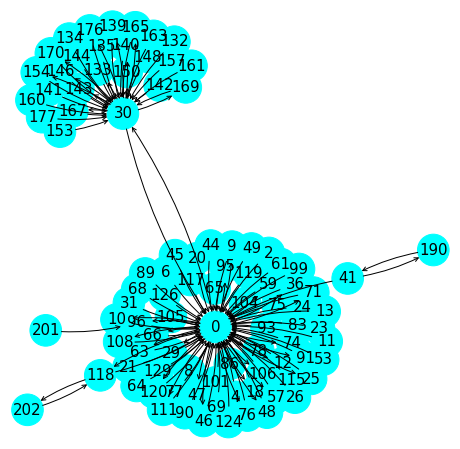

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 222.18it/s]


y: Real
Removing edges with score less than 0.08465147763490677 with min torch.return_types.min(
values=tensor(0.0672),
indices=tensor(19)) and max torch.return_types.max(
values=tensor(0.9505),
indices=tensor(44))
Dropping 32 edges out of 64


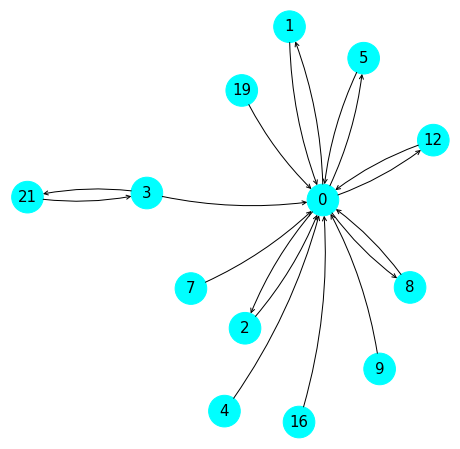

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 225.85it/s]


y: Real
Removing edges with score less than 0.08112975209951401 with min torch.return_types.min(
values=tensor(0.0672),
indices=tensor(2)) and max torch.return_types.max(
values=tensor(0.9418),
indices=tensor(30))
Dropping 25 edges out of 49


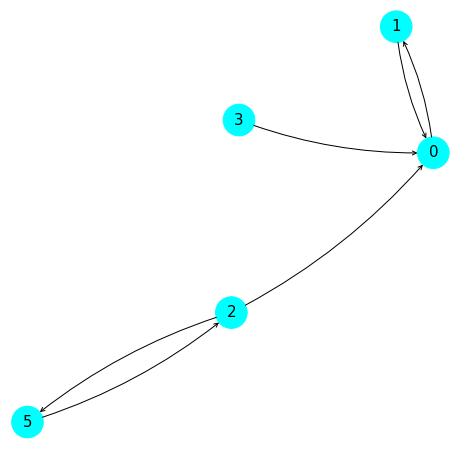

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 221.13it/s]


y: Real
Removing edges with score less than 0.1324935406446457 with min torch.return_types.min(
values=tensor(0.1103),
indices=tensor(289)) and max torch.return_types.max(
values=tensor(0.7947),
indices=tensor(419))
Dropping 472 edges out of 943


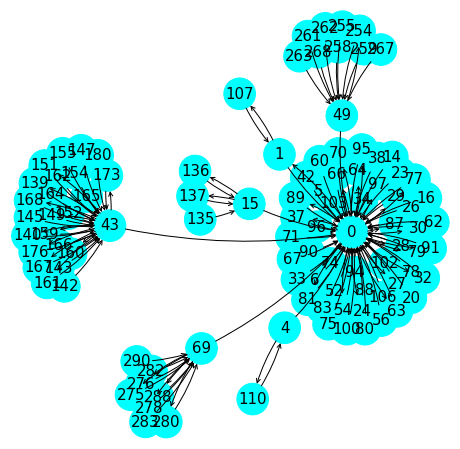

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 221.57it/s]


y: Real
Removing edges with score less than 0.10601035505533218 with min torch.return_types.min(
values=tensor(0.0767),
indices=tensor(103)) and max torch.return_types.max(
values=tensor(0.9159),
indices=tensor(155))
Dropping 110 edges out of 220


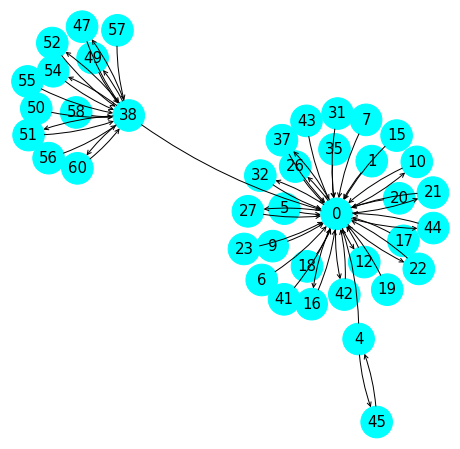

In [14]:

for sample, index in zip(real_sample_data_list, real_sample_data_indexes):
    e = GNNModelExplainer(model, sample)
    e.visualize_explaining_graph()
    sample_id_node_id_dict[index] = e.get_node_ids_of_explaining_subgraph()

In [ ]:
# fetch all fake news
fake_news_torch_ds = dataset_manager.fetch_all_news(label=0)
